# Ej1

# 1.a

Una red de 2 neuronas con sus conexiones y pesos, donde E es la neurona exitatoria e I la inhibitoria. El peso de E hacia I vale a siendo a > 0, ya que E es exitatoria y el peso de I a E vale -a, debido a que se pedia que ambas tengan el mismo peso pero I es inhibitoria 
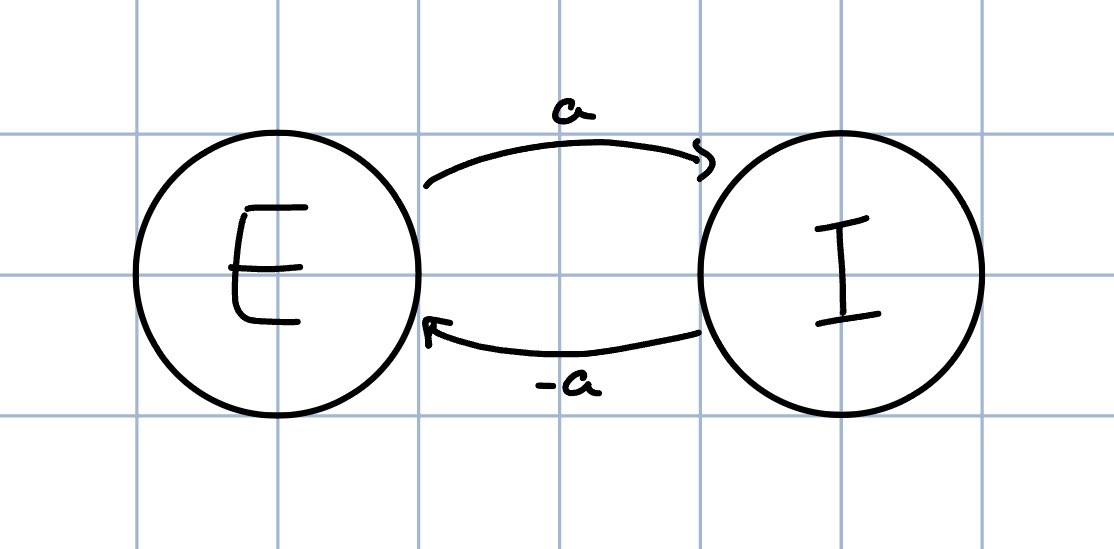

# 1.b
La matriz de pesos es:
\begin{bmatrix}
0 & a \\
-a & 0 \\
\end{bmatrix}

y sus autovalores son

$\lambda_1 = ai$

$\lambda_2 = -ai$

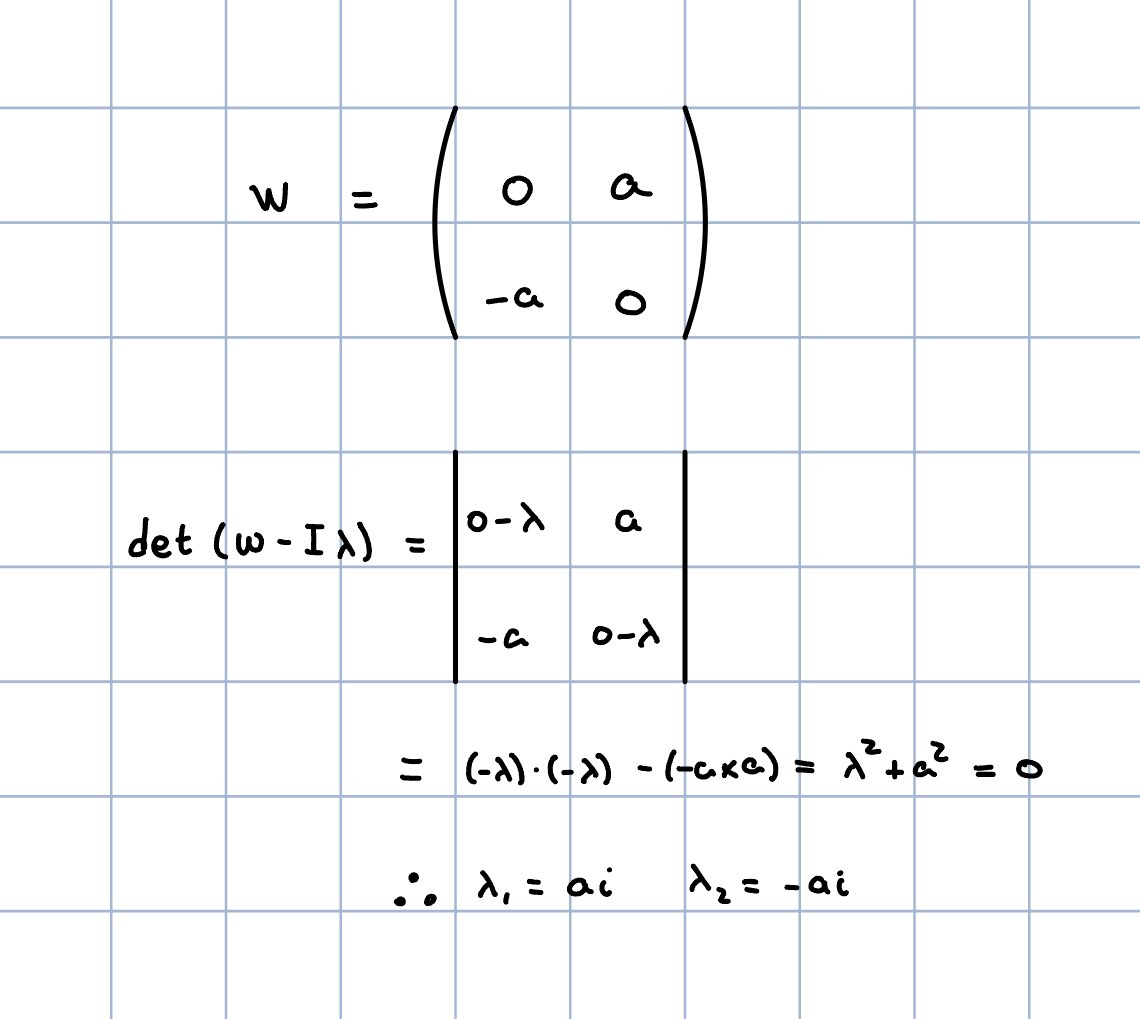


# 1.c
El resultado del sistema es:

$\dot{r}(t) = \frac{e^t}{\tau} \left( \cos(at) + \sin(at), \cos(at) - \sin(at) \right)$

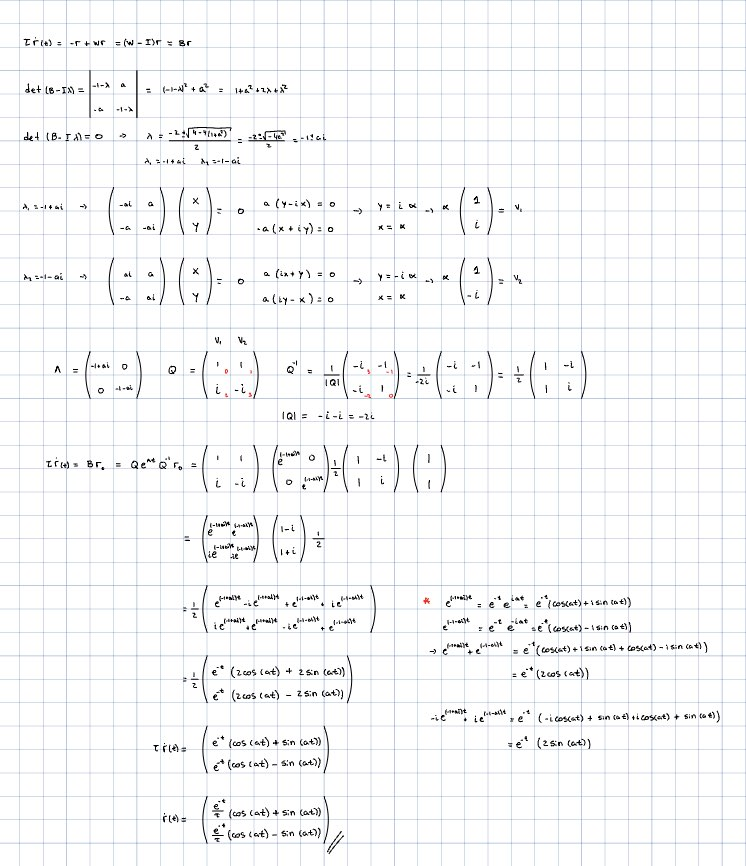

# 1.d

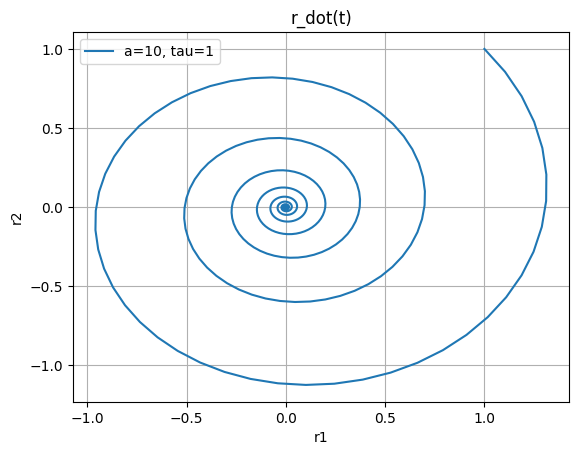

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def n1(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) + np.sin(a*t)))/tau

def n2(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) - np.sin(a*t)))/tau

def r_dot(t, a, tau):
    return (n1(t, a, tau), n2(t, a, tau))

# Plot de r_dot(t)
# t e [0, 2*pi], a=10, tau=1
a = 10
tau = 1
t_values = np.linspace(0, 2*np.pi, 500)
x, y = r_dot(t_values, a, tau)
plt.plot(x, y, label=f'a={a}, tau={tau}')
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('r_dot(t)')
plt.legend()

plt.grid(True)
plt.show()

# 1.e

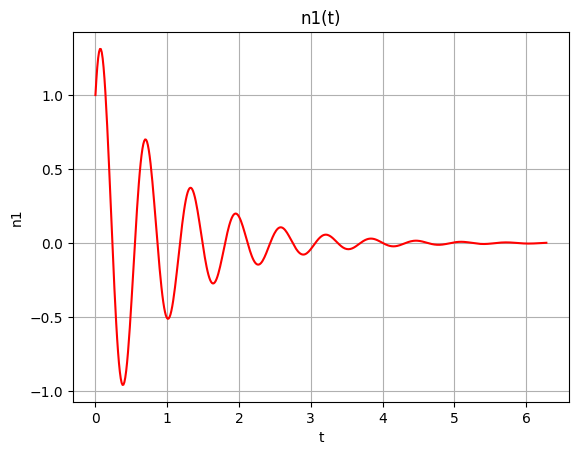

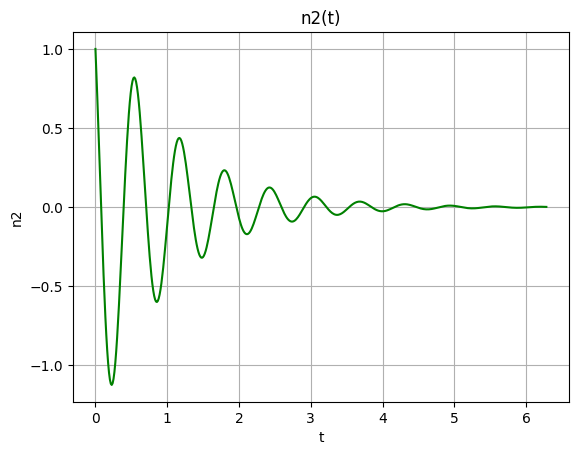

In [2]:
# Plot de la nurona 1 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n1(t_values, a, tau), c='r')
plt.xlabel('t')
plt.ylabel('n1')
plt.title('n1(t)')

plt.grid(True)
plt.show()

# Plot de la nurona 2 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n2(t_values, a, tau), c='g')
plt.xlabel('t')
plt.ylabel('n2')
plt.title('n2(t)')

plt.grid(True)
plt.show()


# Ej2

## 2.a
Luego de realizar el despeje queda lo siguiente:

$r_{t+1} = \left(W \triangle t + I \left(1 - \triangle t\right)\right) r_t + h_t$


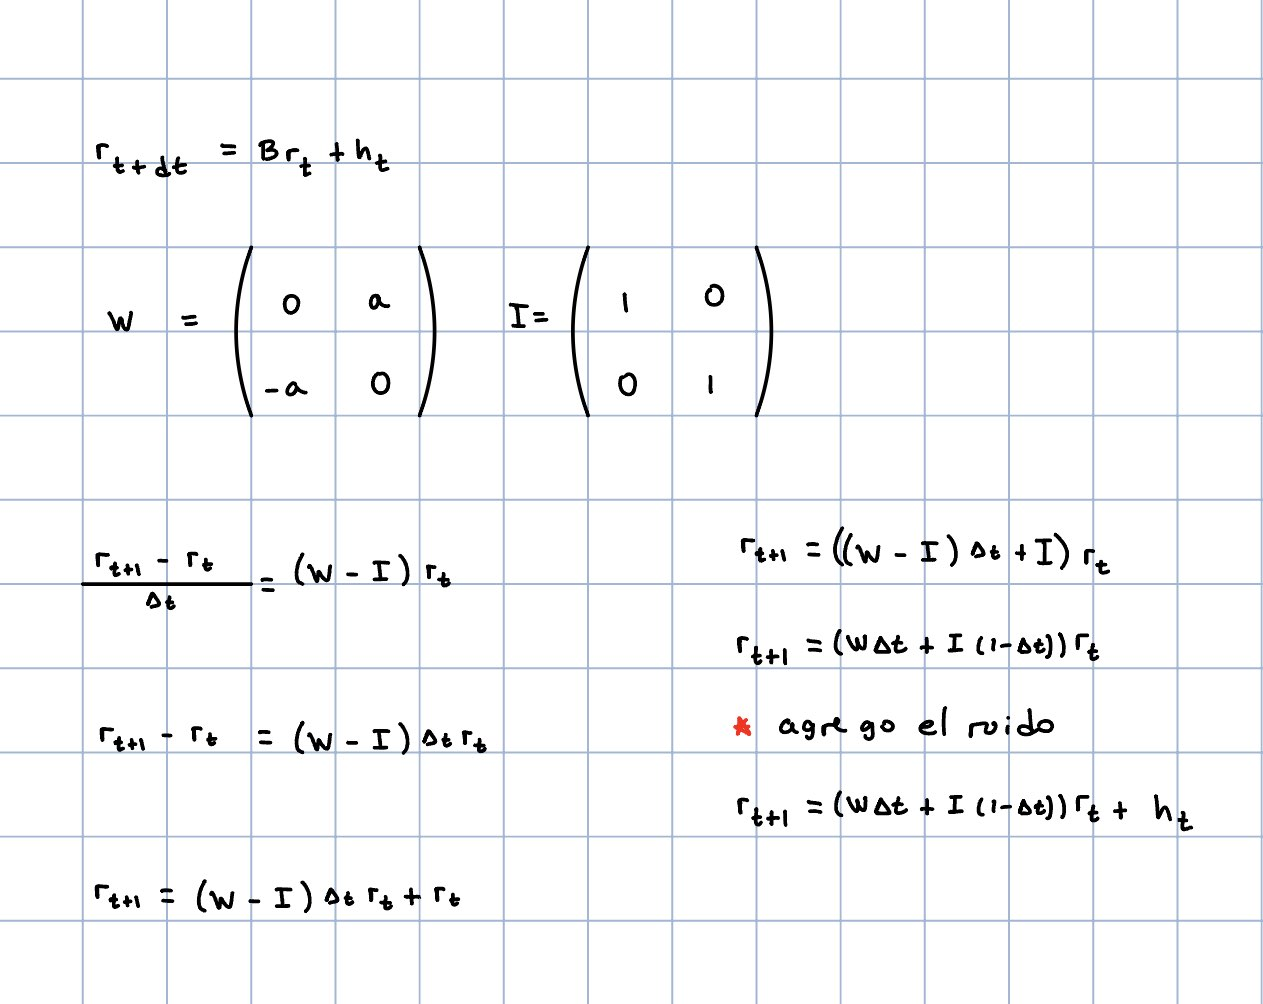

## 2.b
Utilizando las mismas condiciones iniciales que en el ejercicio 1.c, los graficos de n1 vs n2, de n1 vs tiempo y n2 vs tiempo se ven asi:

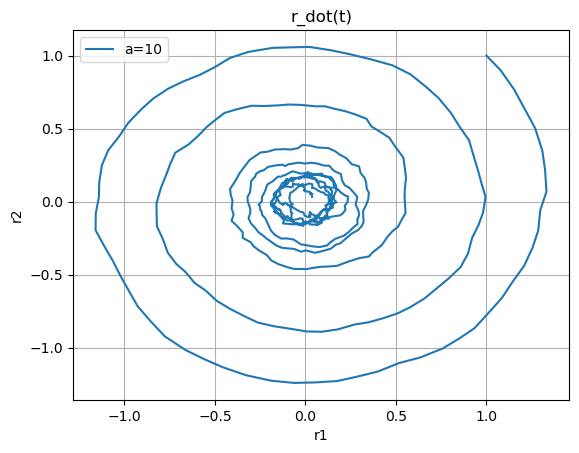

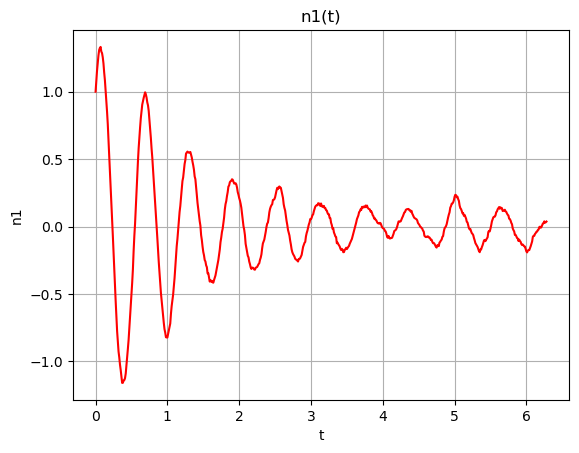

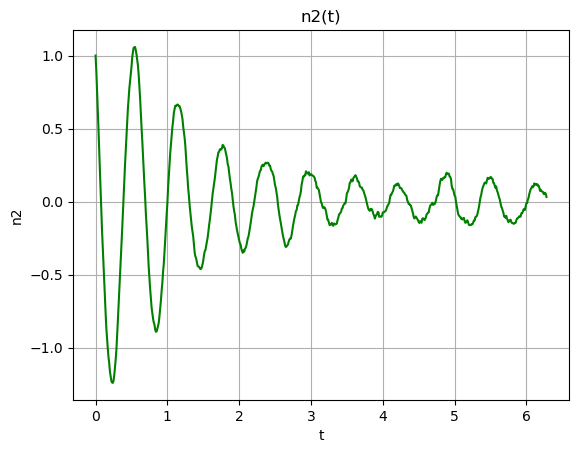

In [44]:
def r_discrete(t0, tf, dt, a, noise=True):
    t_values = np.arange(t0, tf, dt)                                # creo el vector de tiempos
    h = np.random.normal(scale=0.01, size=(t_values.size, 2, 1))    # t_values x 2 x 1 
    r = np.array([[[1], [1]]])                                      # 1 x 2 x 1
    w = np.array([[0, a], [-a, 0]])                                 # 2 x 2
    i = np.identity(2)                                              # 2 x 2

    for index in range(t_values.size):
        next_r = ((i*(1-dt) + dt*w) @ r[index])                     # esto me devuelve 2 x 1
        if(noise):
            next_r = next_r + h[index]                              # le agrego el ruido
        next_r = np.reshape(next_r, (1, 2, 1))                      # para poder concatenarlo necesito 1 x 2 x 1 -> hago reshape
        r = np.concatenate((r, next_r), axis=0)                     # concateno

    return r

r = r_discrete(0, 2*np.pi, 0.01, 10)

# aca me sobra 1 elemento (pq tengo el r_0 + t_values elementos, elimino el ultimo)
n1 = np.resize(r[:, 0], t_values.size)
n2 = np.resize(r[:, 1], t_values.size)

plt.plot(n1, n2, label=f'a={a}')
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('r_dot(t)')
plt.legend()

plt.grid(True)
plt.show()


# Plot de la nurona 1 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n1, c='r')
plt.xlabel('t')
plt.ylabel('n1')
plt.title('n1(t)')

plt.grid(True)
plt.show()

# Plot de la nurona 2 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n2, c='g')
plt.xlabel('t')
plt.ylabel('n2')
plt.title('n2(t)')

plt.grid(True)
plt.show()


## 2.c
Utilizando la funcion del paso anterior, generamos 50 tandas de datos

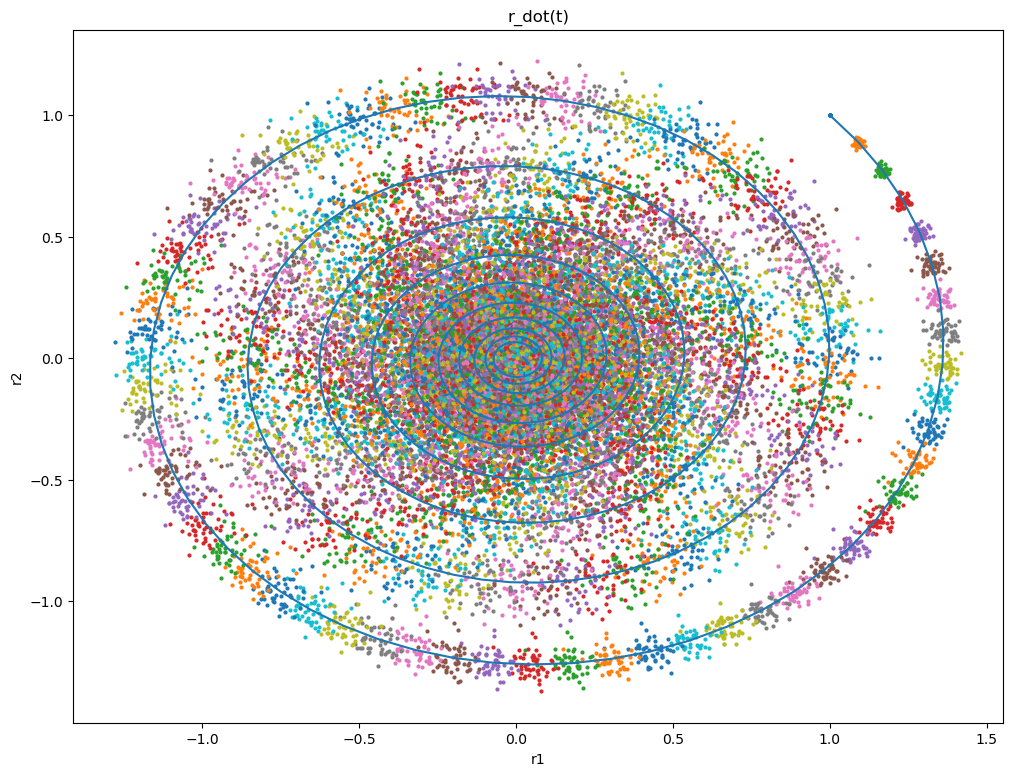

In [76]:
k = 50
dt = 0.01
t_values = np.arange(0, 2*np.pi, dt)

cases = []
for _ in range(k):
    r = r_discrete(0, 2*np.pi, dt, 10)
    cases.append(r)

cases = np.array(cases)
cases = np.transpose(cases, (1, 2, 3, 0))
plt.figure(figsize=(12, 9))

for case in cases:
    n1 = case[0, :]
    n2 = case[1, :]
    plt.scatter(n1, n2, s=4)

r = r_discrete(0, 2*np.pi, dt, 10, False)

plt.plot(r[:, 0], r[:, 1])
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('r_dot(t)')

plt.show()

A medida que pasa el tiempo, incrementa la dispersion en la nube de puntos. Si comparamos contra la version sin ruido (linea azul), se puede observar como con las distintas ejecuciones superpuestas aparecen conglomeraciones divididas por color que incrementan en radio siguiendo la linea hacia el centro de la figura. Esto se debe a que el ruido va entorpeciendo mas los datos en el paso a paso.